In [1]:
import pandas as pd
df = pd.read_csv('./data/spam.csv')

In [2]:
df.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
import warnings
warnings.simplefilter(action='ignore')

In [10]:
from collections import Counter
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [11]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

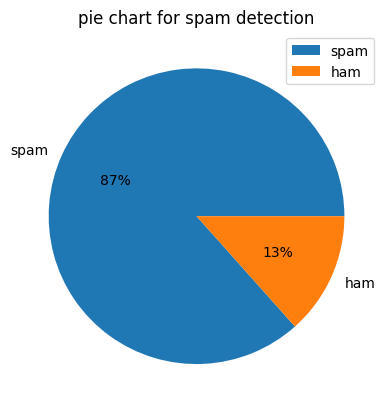

In [14]:
import matplotlib.pyplot as plt
plt.pie(x=df['spam'].value_counts(), labels=['spam', 'ham'], autopct='%1.0f%%')
plt.title('pie chart for spam detection')
plt.legend()
plt.show()

In [16]:
count1 = Counter(''.join(df[df['Category'] == 'ham']['Message']).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1.rename(columns= {0: 'words in non spam', 1 : 'count'})
count2 = Counter(''.join(df[df['Category'] == 'spam']['Message']).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2.rename(columns= {0: 'words in non spam', 1 : 'count'})

,words in non spam,count
0,to,604
1,a,360
2,your,186
3,or,185
4,call,178
5,the,174
6,for,169
7,2,168
8,you,160
9,is,142


In [ ]:
import numpy as np
df1.plot.bar(legend =  False)
y_pos = np.arange(len(df2))


In [17]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


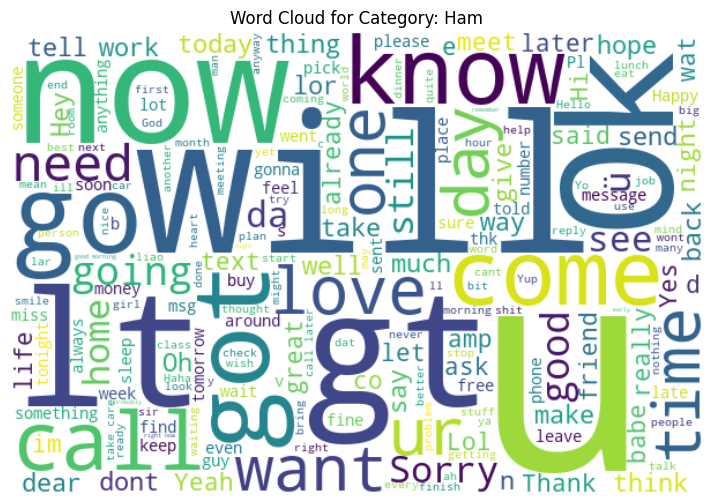

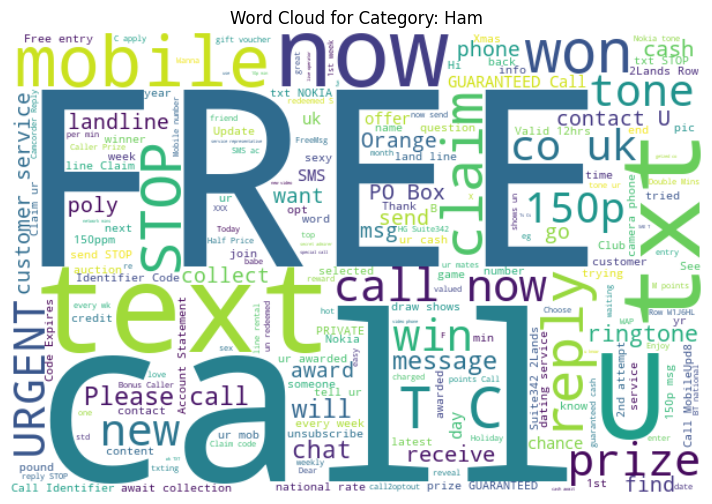

In [22]:
from wordcloud import WordCloud

# Generate a word cloud for each category (ham & spam)
for category in df['Category'].unique():
    filtered_df = df[df['Category'] == category]
    text = ' '.join(filtered_df['Message'])  # Join all messages into one text string

    # Generate Word Cloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Category: {'Spam' if category == 1 else 'Ham'}")
    plt.axis('off')
    plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])

In [24]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74098 stored elements and shape (5572, 8709)>
  Coords	Values
  (0, 3567)	0.14786475068980162
  (0, 8080)	0.2300034410835773
  (0, 4370)	0.32645117023873077
  (0, 5954)	0.25533539230157154
  (0, 2334)	0.25281395947472957
  (0, 1313)	0.24417482890859654
  (0, 5567)	0.156366230319576
  (0, 4110)	0.10707657674366398
  (0, 1763)	0.2757872678027423
  (0, 3651)	0.1803318063070826
  (0, 8544)	0.22081883351949952
  (0, 4497)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 2057)	0.2757872678027423
  (0, 7690)	0.15550627816331297
  (0, 3611)	0.15304155020494287
  (0, 1079)	0.32645117023873077
  (0, 8320)	0.18240101628302693
  (1, 5534)	0.2718944069420321
  (1, 4533)	0.4083258549263009
  (1, 4338)	0.5236804332035243
  (1, 8446)	0.43162957585464123
  (1, 5563)	0.5466243141314314
  (2, 4110)	0.07913674465201573
  (2, 3369)	0.11310793123981583
  :	:
  (5570, 4241)	0.12205359146631063
  (5570, 8367)	0.18796551984834134
  (5570, 10

In [1]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
